# Практикум на ЭВМ 317 группы
## Задание №4
### Никишин Евгений Сергеевич

In [137]:
import numpy as np
import scipy.misc
import time
import task4 as my
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.colors import rgb_to_hsv
from os import listdir
from visualization import *
from JSAnimation import IPython_display
%matplotlib inline

## 1. Реализация EM-алгоритма

### Посмотрим на эффективность реализации

In [28]:
start = time.time()
# N=10000, D=100, K=10
X_big, y_big = my.generate_big_data()
print('worked', round(time.time()-start), 'seconds')

worked 43 seconds


In [29]:
res = my.EM(X=X_big, K=10, n_attempts=4, verbose=True, tol=0.2)

attempt: 1
iteration: 1 with mean likelihood: -101667.253857
iteration: 2 with mean likelihood: -353.728556125
iteration: 3 with mean likelihood: -350.752031715
iteration: 4 with mean likelihood: -348.441858188
iteration: 5 with mean likelihood: -347.785354345
iteration: 6 with mean likelihood: -347.544190806
iteration: 7 with mean likelihood: -347.479941872
Average time per iteration: 3.633399622780936

attempt: 2
iteration: 1 with mean likelihood: -128071.099366
iteration: 2 with mean likelihood: -355.748762875
iteration: 3 with mean likelihood: -344.525883996
iteration: 4 with mean likelihood: -343.127978476
iteration: 5 with mean likelihood: -341.711936751
iteration: 6 with mean likelihood: -340.447272914
iteration: 7 with mean likelihood: -340.444996403
Average time per iteration: 3.6474525247301375

attempt: 3
iteration: 1 with mean likelihood: -102584.424613
iteration: 2 with mean likelihood: -351.504943921
iteration: 3 with mean likelihood: -347.940491921
iteration: 4 with mean

### В среднем на одну итерацию уходит около 3.5 секунд

## 2. Тестирование на двумерных данных

### 2.1 Хорошо разделимые данные

In [236]:
N = 200
D = 2
K = 3
probabilities = [0.5, 0.3, 0.2]
means = np.array([
        [5, 5],
        [0, -10],
        [10, -10]
    ], dtype='float64')

covs = np.array([
        [
            [4, 3],
            [0, 2]
        ],
        [
            [1, 10],
            [0, 4]
        ],
        [
            [1, -10],
            [0, 2]
        ]
    ], dtype='float64')

In [237]:
X_train, y_train = my.generate_data(probabilities=probabilities, means=means, covs=covs, size=N)

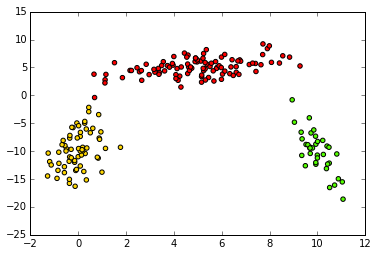

In [238]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)

### Применение EM (заодно удостоверимся в том, что правдоподобие монотонно не убывает)

In [239]:
weights, means, covs, gammas = my.EM(X_train, K=K, verbose=True)

attempt: 1
iteration: 1 with mean log likelihood: -19.8899061251
iteration: 2 with mean log likelihood: -4.6414965028
iteration: 3 with mean log likelihood: -4.57622567386
iteration: 4 with mean log likelihood: -4.5704171392
Average time per iteration: 0.0014625191688537598

attempt: 2
iteration: 1 with mean log likelihood: -19.4012299333
iteration: 2 with mean log likelihood: -5.42773246161
iteration: 3 with mean log likelihood: -5.40603206164
iteration: 4 with mean log likelihood: -5.40156340243
Average time per iteration: 0.0013113021850585938

attempt: 3
iteration: 1 with mean log likelihood: -18.9682425442
iteration: 2 with mean log likelihood: -5.69710474944
iteration: 3 with mean log likelihood: -5.56106915792
iteration: 4 with mean log likelihood: -5.44106529631
iteration: 5 with mean log likelihood: -5.40623620527
iteration: 6 with mean log likelihood: -5.40067508592
Average time per iteration: 0.001224199930826823

attempt: 4
iteration: 1 with mean log likelihood: -22.5228631

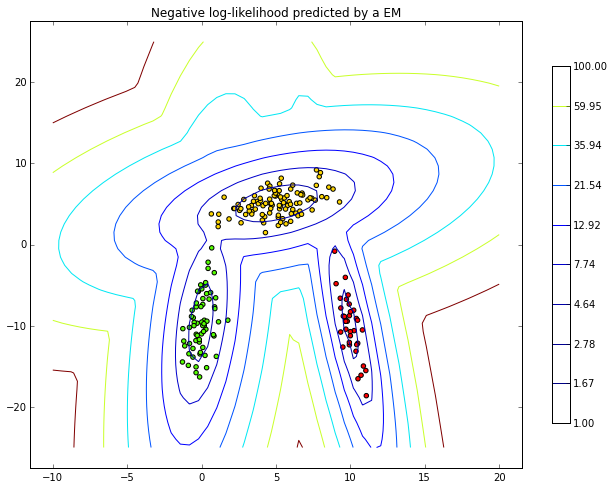

In [240]:
my.visualize(X_train, weights, means, covs, gammas)

### Хорошо разделимые данные хорошо разделились, что неудивительно

### Пример ситуаций, когда результат зависит от начального приближения

In [191]:
weights, means, covs, gammas = my.EM(X_train, K=K, n_attempts=1, verbose=False)

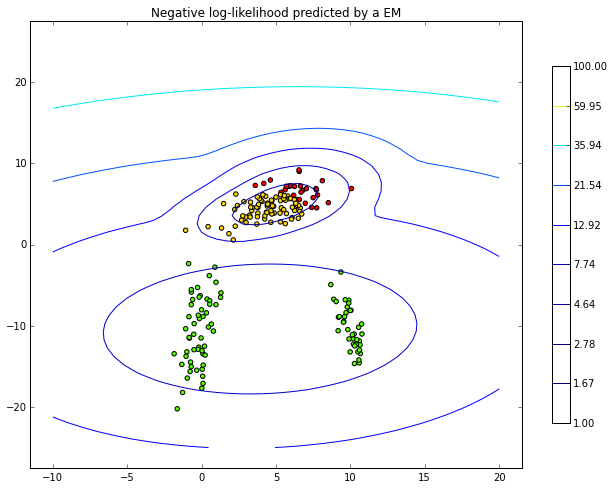

In [192]:
my.visualize(X_train, weights, means, covs, gammas)

In [221]:
weights, means, covs, gammas = my.EM(X_train, K=K, n_attempts=1, verbose=False)

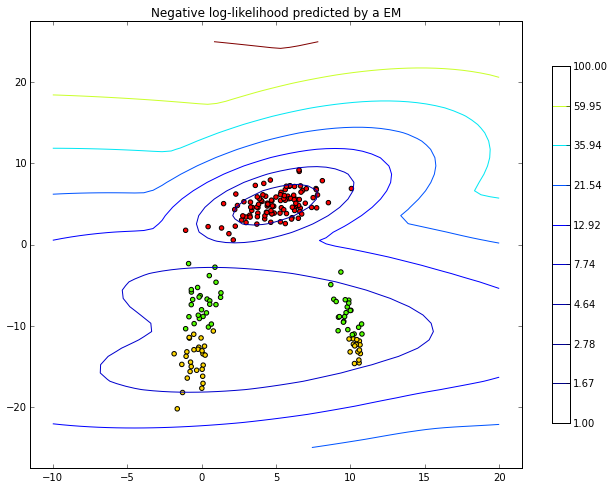

In [222]:
my.visualize(X_train, weights, means, covs, gammas)

### Вывод: при инициализации средних случайными примерами из выборки обязательно нужно запускать несколько раз

### 2.2 Чуть более сложные данные

In [429]:
N = 200
D = 2
K = 2
probabilities = [0.6, 0.4]
means = np.array([
        [5, 5],
        [5, 1]
    ], dtype='float64')

covs = np.array([
        [
            [4, 3],
            [0, 2]
        ],
        [
            [4, 3],
            [0, 2]
        ]
    ], dtype='float64')

In [430]:
X_train, y_train = my.generate_data(probabilities=probabilities, means=means, covs=covs, size=N)

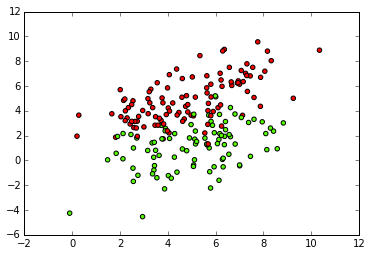

In [431]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)

In [432]:
weights, means, covs, gammas = my.EM(X_train, K=K)

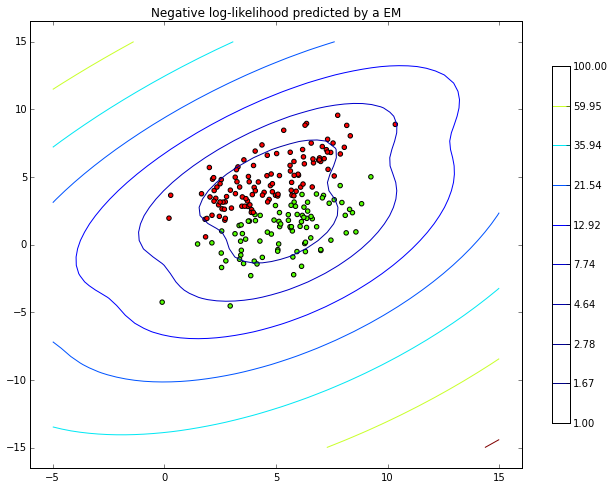

In [433]:
my.visualize(X_train, weights, means, covs, gammas, x_range=(-5, 15), y_range=(-15, 15))

### Тоже достаточно хорошо. ЕМ относит примеры из смеси А к смеси В, если их действительно  логично отнести к смеси В

### 2.3 Совсем смеси

In [402]:
N = 200
D = 2
K = 3
probabilities = [0.5, 0.3, 0.2]
means = np.array([
        [5, 5],
        [2, 12],
        [6, 14]
    ], dtype='float64')

covs = np.array([
        [
            [4, 0],
            [0, 2]
        ],
        [
            [4, 18],
            [0, 4]
        ],
        [
            [4, -15],
            [0, 2]
        ]
    ], dtype='float64')

In [403]:
X_train, y_train = my.generate_data(probabilities=probabilities, means=means, covs=covs, size=N)

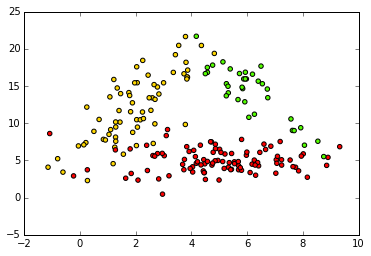

In [404]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)

In [413]:
weights, means, covs, gammas = my.EM(X_train, K=K, n_attempts=7)

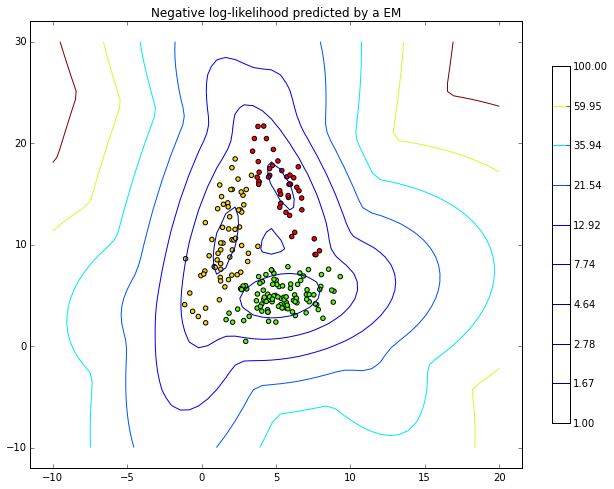

In [415]:
my.visualize(X_train, weights, means, covs, gammas, y_range=(-10, 30))

### В целом, неплохо, но не идеально: центры немного сместились

## Загрузка и предобработка данных для заданий 3-6

### Видео буду делать для всей тестовой выборки, а результаты (F1, ROC) буду делать только для 300 тестовых кадров, потому что не хватает памяти

In [92]:
def read_data():
    path = './dataset2012/dataset/baseline/pedestrians/input/'
    files = sorted(listdir(path))
    shapes = (scipy.misc.imread(path + files[0])).shape
    data = np.empty(shape=(600, shapes[0], shapes[1], shapes[2]), dtype=int) # 600 <-> len(files)
    
    for i in range(600):
        data[i] = scipy.misc.imread(path + files[i])
        # = (0.2126*image[:, :, 0] + 0.7152*image[:, :, 1] + 0.0722*image[:, :, 2])
    
    return data

In [93]:
def read_target():
    path = './dataset2012/dataset/baseline/pedestrians/groundtruth/'
    files = sorted(listdir(path))
    shapes = (scipy.misc.imread(path + files[0])).shape
    target = np.empty(shape=(600, shapes[0], shapes[1]), dtype=int)
    
    for i in range(600):
        target[i] = scipy.misc.imread(path + files[i])
    
    return target

In [94]:
X_train, X_test = read_data()[:300], read_data()[300:]

In [95]:
target = read_target()[300:]

In [101]:
def make_grayscale(data):
    return 0.2126*data[:, :, :, 0] + 0.7152*data[:, :, :, 1] + 0.0722*data[:, :, :, 2]

In [102]:
X_train_gs = make_grayscale(X_train)

In [103]:
X_test_gs = make_grayscale(X_test)

## 3. Оценка фона с помощью одномерной гауссианы

In [104]:
means = np.empty((X_train.shape[1], X_train.shape[2]))
std_deviations = np.empty((X_train.shape[1], X_train.shape[2]))

start = time.time()

for h in range(X_train.shape[1]):
    for w in range(X_train.shape[2]):
        res = my.EM(X=X_train_gs[:, h, w][:, np.newaxis], K=1, n_attempts=1, tol=1e-3, min_cov=1e-4)
        means[h, w] = res[1].ravel() 
        std_deviations[h, w] = np.sqrt(res[2].ravel())
        
print('worked', round(time.time() - start), 'seconds')

worked 63 seconds


In [105]:
k = 10
mask = np.abs(X_test_gs - means[np.newaxis, :, :]) > k * std_deviations[np.newaxis, :, :]

### Оценка результатов

##### Визуально

video = make_video(X_test, mask)
video().save('./gifs/one_gaussian.gif')

##### Аналитически: буду смотреть на точность, полноту и F1 (ROC я так и не сумел построить из-за ограниченной памяти)

In [138]:
def scores(mask, target):
    TP = np.sum(mask[np.where(target == 255)] == True)
    FN = np.sum(mask[np.where(target == 255)] == False)
    FP = np.sum(mask[np.where(target == 0)] == True)
    TN = np.sum(mask[np.where(target == 0)] == False)
    return TP, FN, FP, TN

In [15]:
TP, FN, FP, TN = scores(mask, target)

In [139]:
def precision():
    return TP / (TP + FP)

def recall():
    return TP / (TP + FN)

def F1():
    pr = TP / (TP + FP)
    rec = TP / (TP + FN)
    return 2 * pr * rec / (pr + rec)

def FPR():
    return FP / (FP + TN)

def TPR():
    return TP / (TP + FN)

In [17]:
print('precision =', precision())
print('recall =', recall())
print('F1 score = ', F1())

precision = 0.513183205587
recall = 0.861140999217
F1 score =  0.643113316197


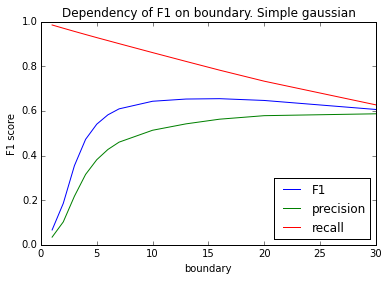

In [29]:
k_list = [1, 2, 3, 4, 5, 6, 7, 10, 13, 16, 20, 30]
f1s = []
precisions = []
recalls = []
for k in k_list:
    mask = np.abs(X_test_gs - means[np.newaxis, :, :]) > k * std_deviations[np.newaxis, :, :]
    TP, FN, FP, TN = scores(mask, target)
    f1s.append(F1())
    precisions.append(precision())
    recalls.append(recall())
plt.plot(k_list, f1s, label='F1')
plt.plot(k_list, precisions, label='precision')
plt.plot(k_list, recalls, label='recall')
plt.legend(loc='best')
plt.xlabel('boundary')
plt.ylabel('metrics')
plt.title('Dependency of metrics on boundary. Simple gaussian')
plt.show()

## 4. Адаптивная гауссиана (в качестве начальных средних и ковариаций использую полученные в предыдущем пункте)

In [106]:
k = 10
ro = 0.02
min_cov = 1e-4
mask = np.empty(X_test_gs.shape, dtype=bool)

for i in range(X_test_gs.shape[0]):
    mask[i] = np.abs(X_test_gs[i] - means) > k * std_deviations
    indices = np.logical_not(mask[i])
    means[indices] = ro * X_test_gs[i][indices] + (1-ro) * means[indices]
    std_deviations[indices] = np.sqrt(ro * (X_test_gs[i][indices] - means[indices]) ** 2 + 
                                      (1-ro) * std_deviations[indices] ** 2)
    std_deviations[np.where(np.isclose(std_deviations, 0))] += min_cov

video = make_video(X_test, mask)
video().save('./gifs/one_gaussian_adaptive.gif')

### Визуально кажется, что фон стал немного лучше обрабатываться (т.е. реже стал выделяться как передний план). Однако стало не сильно лучше, хотя казалось, что должно значительно улучшиться

In [36]:
TP, FN, FP, TN = scores(mask, target)
print('precision =', precision())
print('recall =', recall())
print('F1 score = ', F1())

precision = 0.559215591812
recall = 0.762309909202
F1 score =  0.645156808085


### Аналитически тоже оказалось, что точность возросла на 5%, однако полнота упала на 10%. В результате F1 тот же

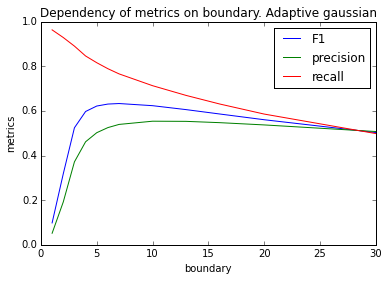

In [107]:
k_list = [1, 2, 3, 4, 5, 6, 7, 10, 13, 16, 20, 30]
f1s = []
precisions = []
recalls = []
for k in k_list:
    mask = np.abs(X_test_gs - means[np.newaxis, :, :]) > k * std_deviations[np.newaxis, :, :]
    TP, FN, FP, TN = scores(mask, target)
    f1s.append(F1())
    precisions.append(precision())
    recalls.append(recall())
plt.plot(k_list, f1s, label='F1')
plt.plot(k_list, precisions, label='precision')
plt.plot(k_list, recalls, label='recall')
plt.legend(loc='best')
plt.xlabel('boundary')
plt.ylabel('metrics')
plt.title('Dependency of metrics on boundary. Adaptive gaussian')
plt.show()

In [40]:
%reset -f

### 5.1 Многомерная гауссиана RGB

In [69]:
means = np.empty((X_train.shape[1], X_train.shape[2], X_train.shape[3]))
covs = np.empty((X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[3]))
neg_log_densities = np.empty((X_test.shape[0], X_train.shape[1], X_train.shape[2]), dtype='float128')

start = time.time()

for h in range(X_train.shape[1]):
    for w in range(X_train.shape[2]):
        res = my.EM(X=X_train[:, h, w], K=1, n_attempts=2, tol=1e-4, min_cov=1e-4)
        means[h, w] = res[1].ravel() 
        covs[h, w] = res[2].reshape(X_train.shape[3], X_train.shape[3])
        neg_log_densities[:, h, w] = -my.matrix_log_pdf(X_test[:, h, w, :], means[h, w], covs[h, w])
        
print('worked', round(time.time() - start), 'seconds')

worked 150 seconds


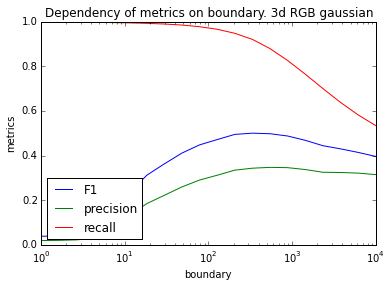

In [87]:
k_list = np.logspace(0, 4, num=20)
f1s = []
precisions = []
recalls = []

for k in k_list:
    mask = neg_log_densities > k
    TP, FN, FP, TN = scores(mask, target)
    f1s.append(F1())
    precisions.append(precision())
    recalls.append(recall())
    
plt.plot(k_list, f1s, label='F1')
plt.plot(k_list, precisions, label='precision')
plt.plot(k_list, recalls, label='recall')
plt.legend(loc='lower left')
plt.xscale('log')
plt.xlabel('boundary')
plt.ylabel('metrics')
plt.title('Dependency of metrics on boundary. 3d RGB gaussian')
plt.show()

In [88]:
mask = neg_log_densities > 300

video = make_video(X_test, mask)
video().save('./gifs/one_gaussian_multi_rgb(cut).gif')

### Видно, что такой подход дает очень высокую полноту, однако очень мала точность. Что из этого важнее -- зависит от задачи

### 5.2 Многомерная гауссиана HSV

In [108]:
X_train_hsv = rgb_to_hsv(X_train / 255) * 255
X_test_hsv = rgb_to_hsv(X_test / 255) * 255

In [109]:
means = np.empty((X_train.shape[1], X_train.shape[2], X_train.shape[3]))
covs = np.empty((X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[3]))
neg_log_densities = np.empty((X_test.shape[0], X_train.shape[1], X_train.shape[2]), dtype='float128')

start = time.time()

for h in range(X_train.shape[1]):
    for w in range(X_train.shape[2]):
        res = my.EM(X=X_train_hsv[:, h, w], K=1, n_attempts=2, tol=1e-4, min_cov=1e-4)
        means[h, w] = res[1].ravel() 
        covs[h, w] = res[2].reshape(X_train.shape[3], X_train.shape[3])
        neg_log_densities[:, h, w] = -my.matrix_log_pdf(X_test_hsv[:, h, w, :], means[h, w], covs[h, w])
        
print('worked', round(time.time() - start), 'seconds')

worked 170 seconds


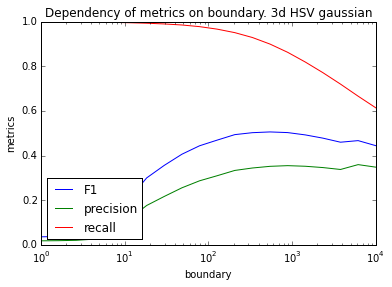

In [110]:
k_list = np.logspace(0, 4, num=20)
f1s = []
precisions = []
recalls = []

for k in k_list:
    mask = neg_log_densities > k
    TP, FN, FP, TN = scores(mask, target)
    f1s.append(F1())
    precisions.append(precision())
    recalls.append(recall())
    
plt.plot(k_list, f1s, label='F1')
plt.plot(k_list, precisions, label='precision')
plt.plot(k_list, recalls, label='recall')
plt.legend(loc='lower left')
plt.xlabel('boundary')
plt.xscale('log')
plt.ylabel('metrics')
plt.title('Dependency of metrics on boundary. 3d HSV gaussian')
plt.show()

In [111]:
mask = neg_log_densities > 300

##### Сохранить видео для всей последовательности так и не удалось

video = make_video(X_test, mask)
video().save('./gifs/one_gaussian_multi_hsv(cut).gif')

### HSV не сильно отличается от RGB

### 6. Смесь из трех трехмерных гауссиан 

In [140]:
def read_data():
    path = './dataset2012/dataset/cameraJitter/traffic/input/'
    files = sorted(listdir(path))
    shapes = (scipy.misc.imread(path + files[0])).shape
    data = np.empty(shape=(len(files), shapes[0], shapes[1], shapes[2]), dtype=int) # 600 <-> len(files)
    
    for i in range(len(files)):
        data[i] = scipy.misc.imread(path + files[i])
        # = (0.2126*image[:, :, 0] + 0.7152*image[:, :, 1] + 0.0722*image[:, :, 2])
    
    return data

In [141]:
def read_target():
    path = './dataset2012/dataset/cameraJitter/traffic/groundtruth/'
    files = sorted(listdir(path))
    shapes = (scipy.misc.imread(path + files[0])).shape
    target = np.empty(shape=(len(files), shapes[0], shapes[1]), dtype=int)
    
    for i in range(len(files)):
        target[i] = scipy.misc.imread(path + files[i])
    
    return target

In [142]:
data = read_data()
X_train, X_test = data[:900], data[900:]
target = read_target()[900:]

In [124]:
K = 3
means = np.empty((K, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
covs = np.empty((K, X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[3]))
log_probabilities = np.empty((X_test.shape[0], K))
neg_log_densities = np.empty((X_test.shape[0], X_train.shape[1], X_train.shape[2]), dtype='float128')

start = time.time()

for h in range(X_train.shape[1]):
    for w in range(X_train.shape[2]):
        res = my.EM(X=X_train[:, h, w], K=K, n_attempts=2, tol=1e-3, min_cov=1e-4, verbose=False)
        means[:, h, w] = res[1]
        covs[:, h, w] = res[2]#.reshape(X_train.shape[3], X_train.shape[3])
        weights = res[0]
        
        for k in range(K):
            log_probabilities[:, k] = my.matrix_log_pdf(X_test[:, h, w, :], 
                                                        means[k, h, w], covs[k, h, w]) + np.log(weights[k])
        neg_log_densities[:, h, w] = -scipy.misc.logsumexp(log_probabilities, axis=1)
        #densities[:, h, w] = np.exp(my.matrix_log_pdf(X_test[:, h, w, :], means[h, w], covs[h, w]))
        
print('worked', round(time.time() - start), 'seconds')

worked 2768 seconds


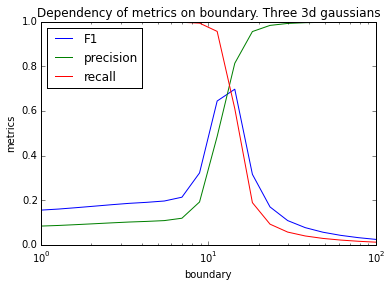

In [129]:
k_list = np.logspace(0, 2, num=20)
f1s = []
precisions = []
recalls = []

for k in k_list:
    mask = neg_log_densities > k
    TP, FN, FP, TN = scores(mask, target)
    f1s.append(F1())
    precisions.append(precision())
    recalls.append(recall())
    
plt.plot(k_list, f1s, label='F1')
plt.plot(k_list, precisions, label='precision')
plt.plot(k_list, recalls, label='recall')
plt.legend(loc='upper left')
plt.xlabel('boundary')
plt.xscale('log')
plt.ylabel('metrics')
plt.title('Dependency of metrics on boundary. Three 3d gaussians')
plt.show()

In [133]:
mask = neg_log_densities > 14
TP, FN, FP, TN = scores(mask, target)
print(F1())
print(precision())
print(recall())

0.7164987096
0.781732470165
0.661313622437


In [134]:
mask = neg_log_densities > 14

video = make_video(X_test, mask)
video().save('./gifs/three_gaussians.gif')

### В целом, неплохо для такой нестатичной камеры

### Запустим traffic для одной гауссианы

In [143]:
means = np.empty((X_train.shape[1], X_train.shape[2], X_train.shape[3]))
covs = np.empty((X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[3]))
neg_log_densities = np.empty((X_test.shape[0], X_train.shape[1], X_train.shape[2]), dtype='float128')

start = time.time()

for h in range(X_train.shape[1]):
    for w in range(X_train.shape[2]):
        res = my.EM(X=X_train[:, h, w], K=1, n_attempts=2, tol=1e-4, min_cov=1e-4)
        means[h, w] = res[1].ravel() 
        covs[h, w] = res[2].reshape(X_train.shape[3], X_train.shape[3])
        neg_log_densities[:, h, w] = -my.matrix_log_pdf(X_test[:, h, w, :], means[h, w], covs[h, w])
        
print('worked', round(time.time() - start), 'seconds')

worked 205 seconds


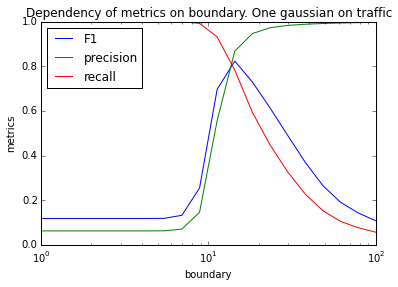

In [145]:
k_list = np.logspace(0, 2, num=20)
f1s = []
precisions = []
recalls = []

for k in k_list:
    mask = neg_log_densities > k
    TP, FN, FP, TN = scores(mask, target)
    f1s.append(F1())
    precisions.append(precision())
    recalls.append(recall())
    
plt.plot(k_list, f1s, label='F1')
plt.plot(k_list, precisions, label='precision')
plt.plot(k_list, recalls, label='recall')
plt.legend(loc='upper left')
plt.xlabel('boundary')
plt.xscale('log')
plt.ylabel('metrics')
plt.title('Dependency of metrics on boundary. One gaussian on traffic')
plt.show()

In [146]:
mask = neg_log_densities > 14
TP, FN, FP, TN = scores(mask, target)
print(F1())
print(precision())
print(recall())

0.826521553647
0.851490808759
0.802974984466


video = make_video(X_test, mask)
video().save('./gifs/one_gaussian_traffic.gif')

### Вышло так, что одна гауссиана справилась лучше, чем смесь из трех. Это может показаться противоречивым, однако часто оказывается так, что простая модель функционирует лучше сложной.